## **Setup & Load the Data**
---

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import pytz
from IPython.display import display
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns

In [2]:
# Load a CSV file from your local file system
df = pd.read_csv('C:/Users/Admin/OneDrive/10 Academy/Week 1/Technical Content/Data/raw_analyst_ratings_cleaned.csv')
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


--- 
## **Text Analysis & Topic Modeling**
### **Common Keywords/Phrases:**

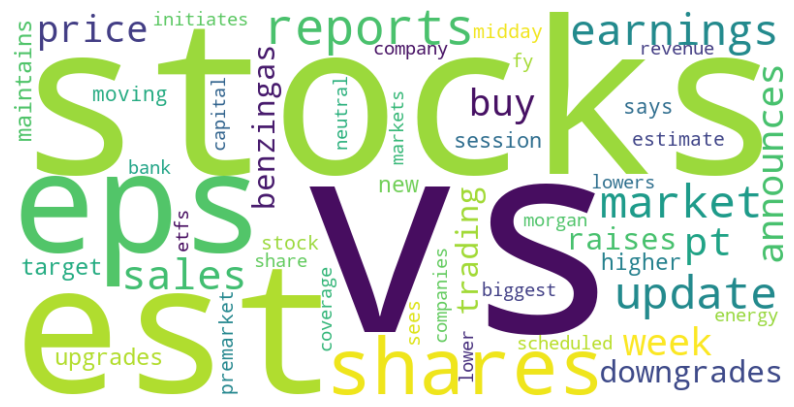

In [4]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Clean headlines
df['cleaned_headline'] = df['headline'].apply(lambda x: re.sub(r'[^a-zA-Z ]', '', str(x).lower()))

# Use CountVectorizer to find most frequent words
vectorizer = CountVectorizer(stop_words='english', max_features=50)
X = vectorizer.fit_transform(df['cleaned_headline'])
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

# Display word cloud
plt.figure(figsize=(10, 6))
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


### **Summary of Text Analysis & Topic Modeling**

- The dataset contains over 1.4 million financial news headlines, which have been cleaned for analysis.
- Using `CountVectorizer`, the 50 most frequent keywords in the headlines were extracted, excluding common English stopwords.
- The most common words include: `vs`, `stocks`, `eps`, `reports`, `shares`, `sales`, `update`, `market`, `price`, `buy`, `downgrades`, `trading`, and `target`.
- A word cloud visualization highlights these frequent terms, indicating that the dataset is rich in financial reporting, stock movements, earnings, and analyst actions (such as upgrades, downgrades, and price targets).
- This analysis provides insight into the main topics and trends discussed in financial news headlines.